**Exploratory Data Analysis(EDA) on the Titanic Dataset**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style = 'whitegrid')

LOADING THE DATASET


In [44]:
!git clone 'https://github.com/Vis2705/datasets'

fatal: destination path 'datasets' already exists and is not an empty directory.


In [45]:
df = pd.read_csv('/content/datasets/Titanic-Dataset.csv')

In [46]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df.shape

(891, 12)

In [49]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [50]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [51]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Finding the missing values**

In [52]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Filling the missing** **values**

In [53]:
medianAge = df['Age'].median()
print(medianAge)

28.0


In [54]:
df['Age'] = df['Age'].fillna(medianAge)

In [55]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
modeEmbarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(modeEmbarked)
print(modeEmbarked)

S


In [57]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [58]:
df['Has_Cabin'] = df['Cabin'].notna().astype(int)

In [59]:
df.drop('Cabin',axis = 1, inplace = True)

In [60]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

**Feature Analysis**

Analyzing categorical features:


/tmp/ipython-input-189/3050574865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='Survived', data=df, palette="coolwarm").set_title('Survival Distribution')
/tmp/ipython-input-189/3050574865.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x='Pclass', data=df, palette="Set2").set_title('Passenger Class Distribution')
/tmp/ipython-input-189/3050574865.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 2], x='Sex', data=df, palette="pastel").set_title('Gender Distribution')
/tmp/ipython

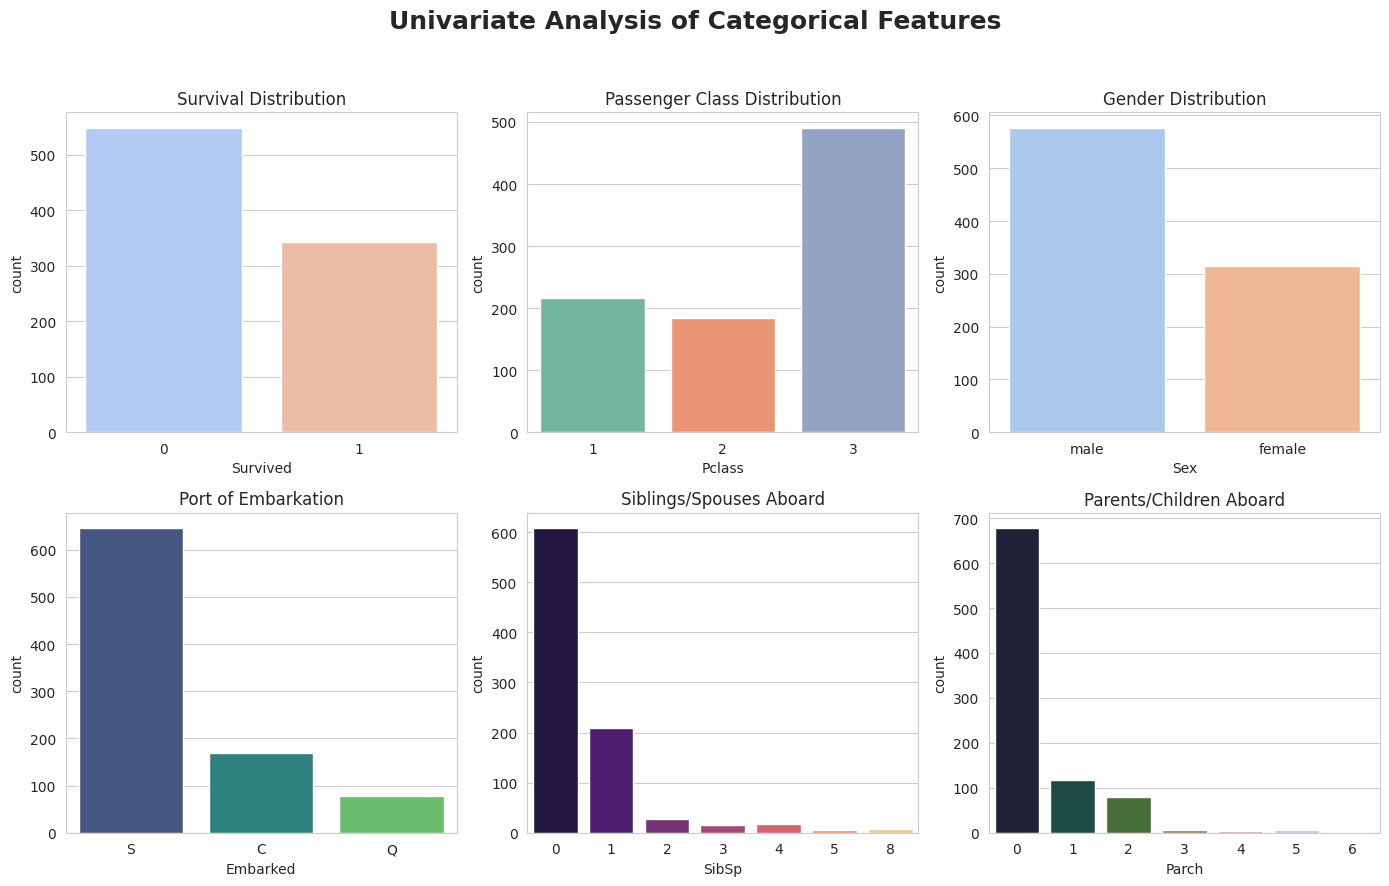

In [61]:
print("Analyzing categorical features:")

fig, axes = plt.subplots(2, 3, figsize=(14, 9))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=18, fontweight='bold')

sns.countplot(ax=axes[0, 0], x='Survived', data=df, palette="coolwarm").set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df, palette="Set2").set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df, palette="pastel").set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df, palette="viridis").set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df, palette="magma").set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df, palette="cubehelix").set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

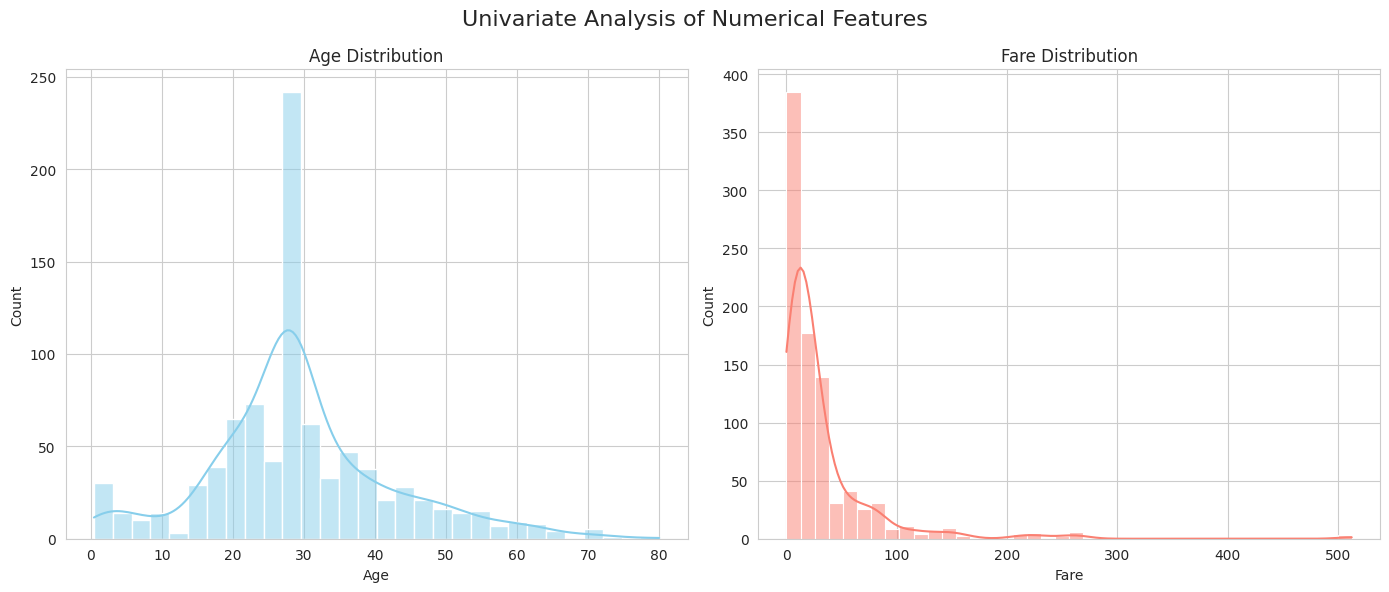

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Univariate Analysis of Numerical Features", fontsize=16)

sns.histplot(df['Age'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df['Fare'], kde=True, bins=40, color='salmon', ax=axes[1])
axes[1].set_title("Fare Distribution")

plt.tight_layout()
plt.show()

**Bivariate Analysis**

Bivariate Analysis: Survival


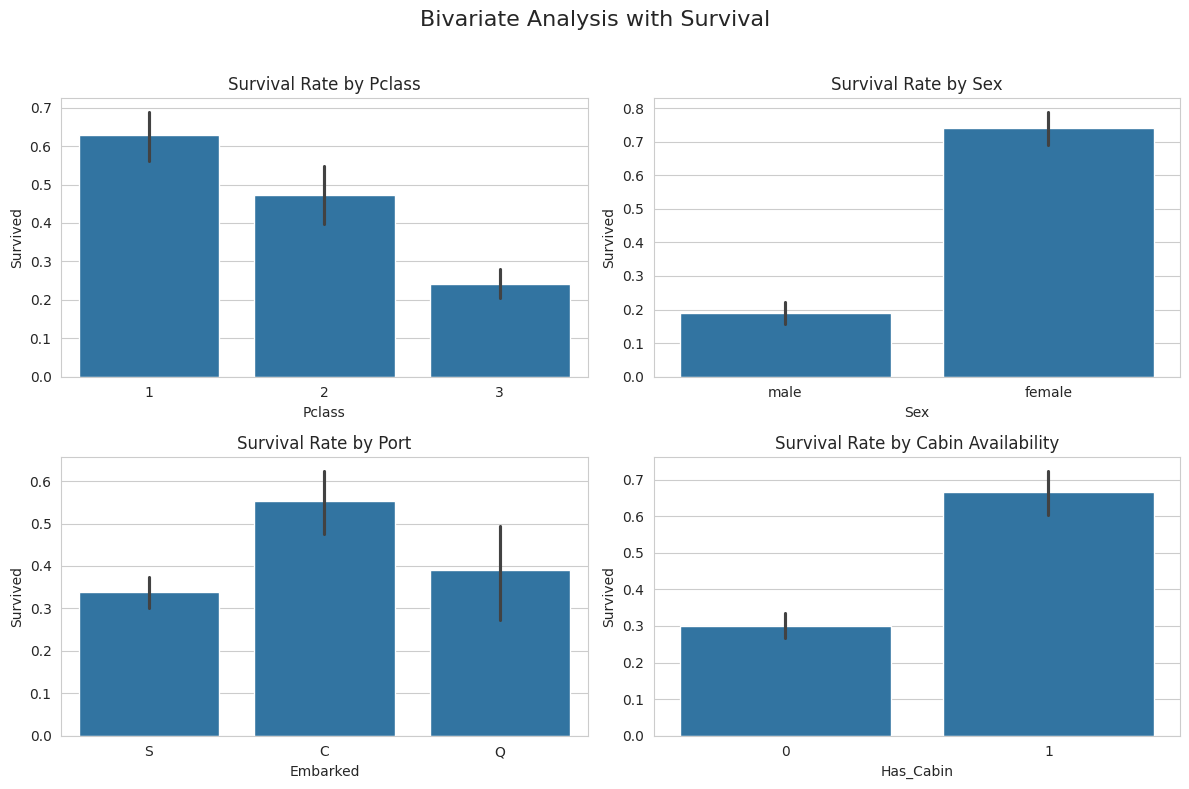

In [63]:
print("Bivariate Analysis: Survival")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Bivariate Analysis: Age


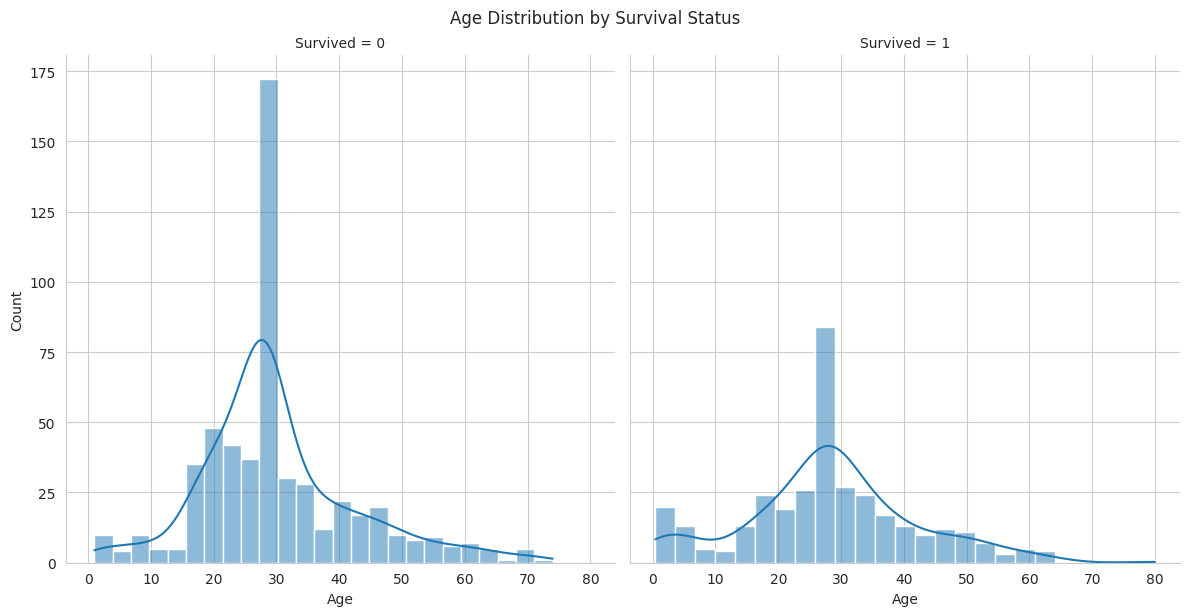

In [64]:
print("Bivariate Analysis: Age")
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

**Identifying Outliers**

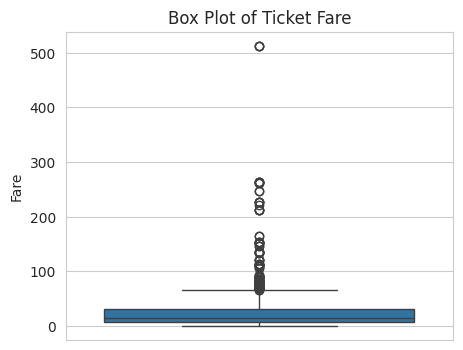

In [65]:
plt.figure(figsize=(5,4))
sns.boxplot(y='Fare',data=df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

**FEATURE ENGINEERING**

**Combining two features**

In [66]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [67]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  FamilySize  IsAlone  
0      0         A/5 21171   7.2500        S          0           2        0  
1      0          PC 17599  71.2833        C          1           2        0  
2      0  STON/O2. 3101282   7.9250        S          0           1        1  
3      0            113803  53.1000        S          1           2        0  
4      0            373450   8.0500        S          0           1        1

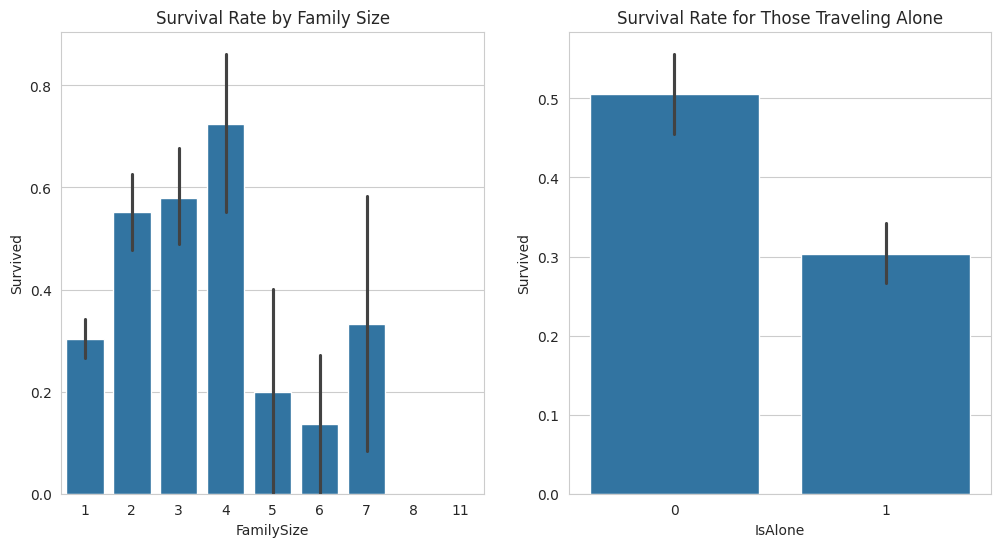

In [68]:
fig, axes = plt.subplots(1,2, figsize = (12,6))
sns.barplot(ax = axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')
plt.show()

**Extracting Title from Name**

In [69]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  FamilySize  IsAlone  
0      0         A/5 21171   7.2500        S          0           2        0  
1      0          PC 17599  71.2833        C          1           2        0  
2      0  STON/O2. 3101282   7.9250        S          0           1        1  
3      0            113803  53.1000        S          1           2        0  
4      0            373450   8.0500        S          0           1        1

In [70]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

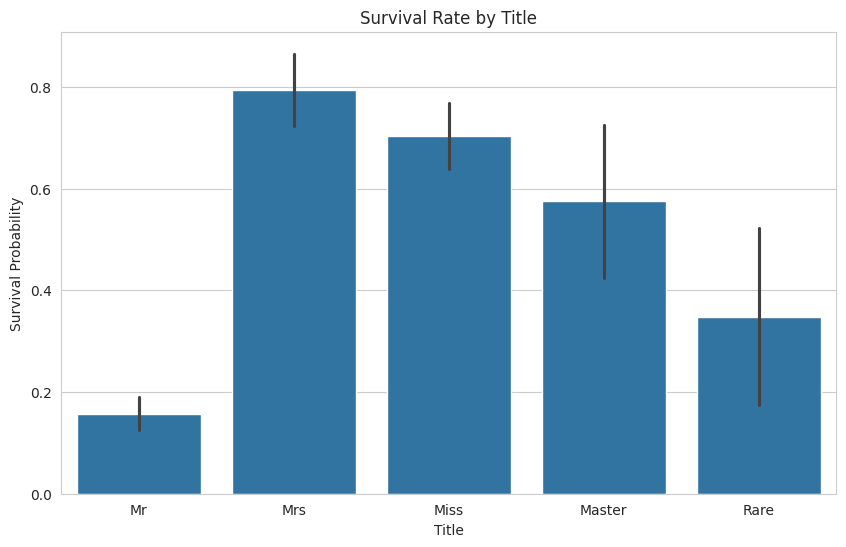

In [71]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Multivariate Analysis**

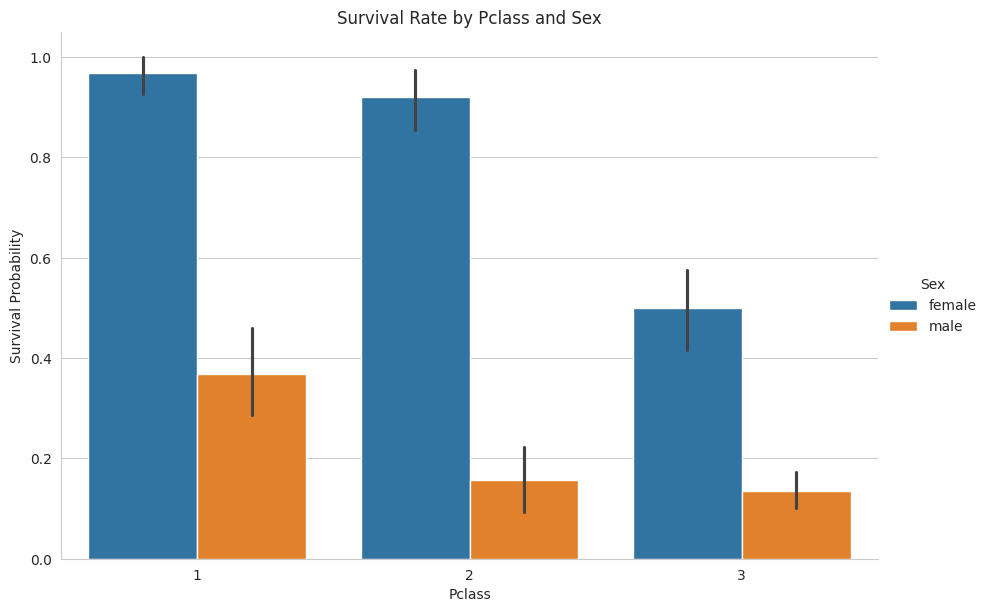

In [72]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()


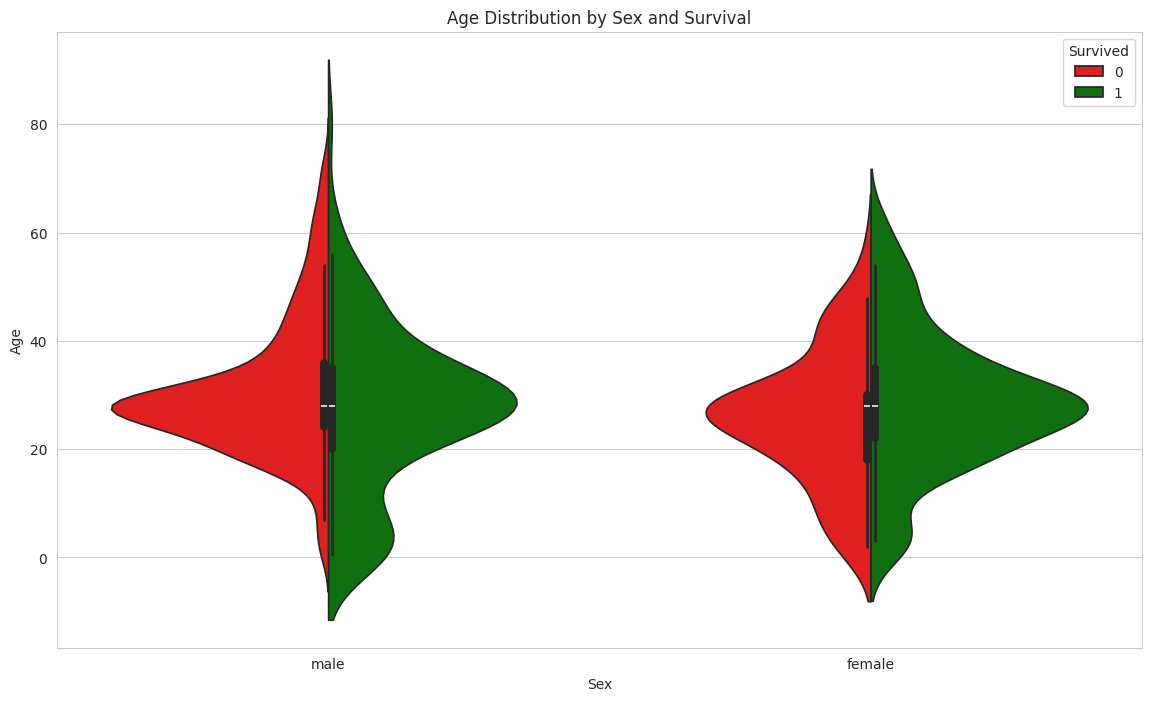

In [73]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'red', 1: 'green'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

**Correlation Matrix**

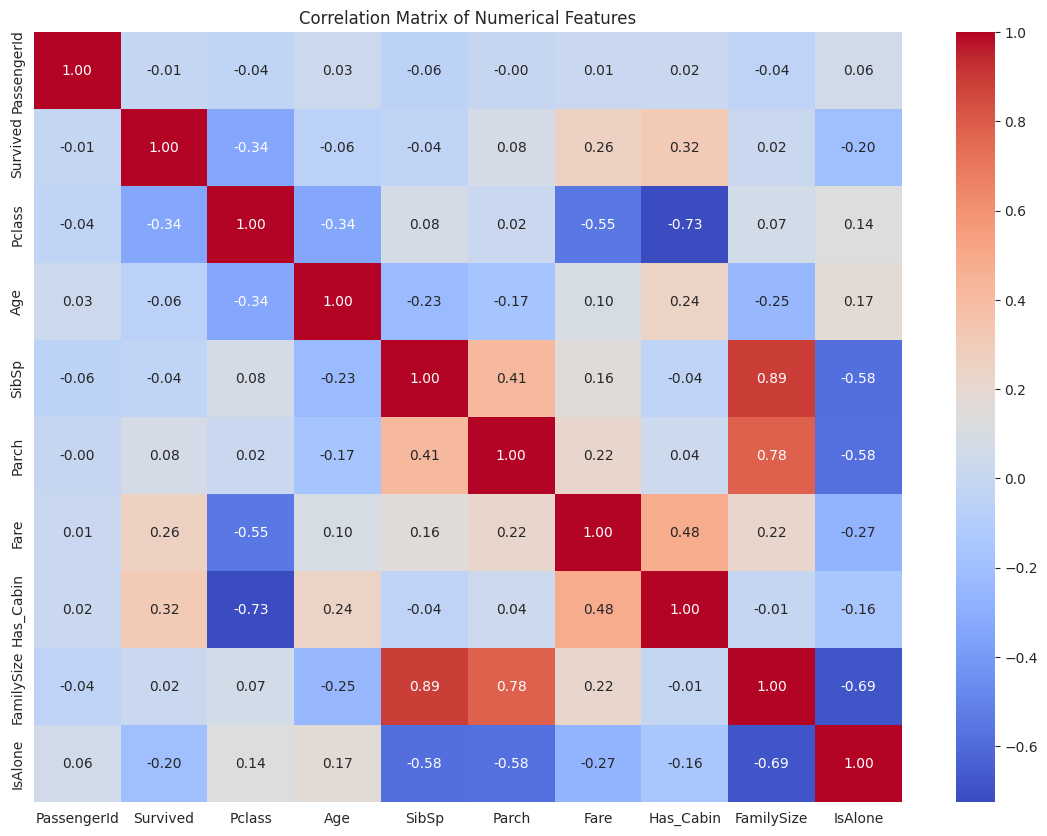

In [74]:
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [75]:
!pip install ydata-profiling -q

In [40]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 44.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
from google.colab import files
files.download("report.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>